In [1]:
import pandas as pd 
import geopandas as gpd

In [79]:
peaks_osm = gpd.read_file('data/row_data/caucasus_peaks.geojson')
peaks_osm = peaks_osm[['name','ele', 'geometry']]
peaks_osm = peaks_osm[peaks_osm.name != '']

peaks_osm.name = peaks_osm.name.str.lower()

peaks_far = pd.read_csv('data/row_data/Копия клсфктр 2.4 приэльбрусье.csv', sep = ';')
peaks_far.name = peaks_far.name.str.lower()

In [81]:
peaks_far['to_connect'] = peaks_far.name.str.split(' ', expand=True)[0]
peaks_osm['to_connect'] = peaks_osm.name.str.split(' ', expand=True)[0]

In [82]:
peaks = peaks_osm.merge(peaks_far,on = 'to_connect')

In [88]:
peaks.to_file('peaks.geojson', driver="GeoJSON")

In [60]:
peaks_osm

,name,ele,to_connect
0,дыхтау,5205,дыхтау
3,малый тау,1254,малый
4,козьи скалы,1167,козьи
5,лохматая (зеленый мыс),1080,лохматая
6,лисий нос,1124,лисий
...,...,...,...
4448,зумух,2488.1,зумух
4450,цумбери,3702.7,цумбери
4453,керейкау,2693,керейкау
4454,шаинкорт,3942,шаинкорт


In [11]:
mask = gpd.read_file('bezengi_demo_project/bezengi_data.gpkg', layer='cut_boundary')

<AxesSubplot:>

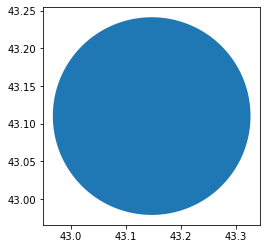

Обработка данных GLIMS

In [35]:
#в данных есть какой то не ясный пиздец на стаковерфло есть решение он округляет координаты до заданного знака (precision)
import numpy as np
from shapely.geometry import shape, mapping
def around(coords, precision=5):
    result = []
    try:
        return round(coords, precision)
    except TypeError:
        for coord in coords:
            result.append(around(coord, precision))
    return result
def layer_precision(geometry, precision=5):
    geojson = mapping(geometry)
    geojson['coordinates'] = around(geojson['coordinates'],precision)
    return shape(geojson)


In [48]:
ice = gpd.read_file('ice/glims_polygons.shp') 
ice = ice.explode() #раскрыть мультиполигоны в полигоны 
ice.loc[:,"geometry"] = ice["geometry"].apply(lambda x: layer_precision(x, precision=5)) #округляем геометрии по пятому знаку 

In [59]:
ice = ice[ice.geog_area == 'Caucausus Region'] #нашел признак по которому можно резать - оставляем только кавказ

In [61]:
gpd.clip(ice, mask)

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 43.108800000000002 43.130699999999997 0 at 43.108800000000002 43.130699999999997 0


TopologicalError: The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x000001A53FAA3040>

In [62]:
ice.to_file('ice.geojson')

нужно отфильровать данные по времени + уникальности 